<a href="https://colab.research.google.com/github/sohaibwaheedgithub/Machine-Learning-And-Deep-Learning-Projects/blob/main/Fashion_MNIST_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries and APIs

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Fetching fashion mnist data 

from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Scaling input featuers so that they range from 0 to 1 
# to speed up gradient descent's convergence and also splitting train set
# into validation set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# Giving names to classes

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


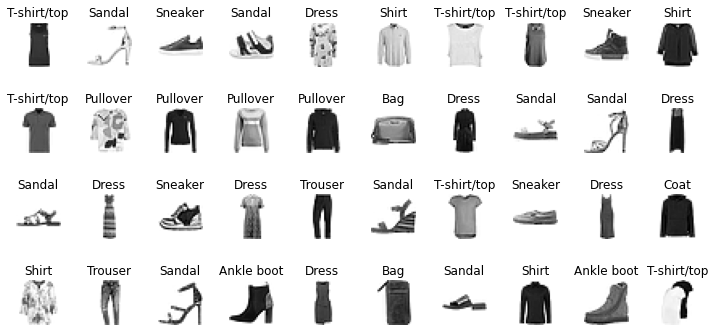

In [ ]:
# Displaying some images with their labels

random_indices = np.random.permutation(X_train.shape[0])[:40]

fig = plt.figure(figsize = (10, 5))
idx = 1
for img, lab in zip(X_train[random_indices], y_train[random_indices]):
  fig.add_subplot(4, 10, idx)
  plt.imshow(img ,cmap = 'gray_r')
  plt.axis('off')
  plt.title(class_names[lab])
  idx += 1
plt.tight_layout()

In [ ]:
# Buliding a Multi Layer Perceptron (MLP) 

model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape = [28, 28]),
     keras.layers.Dense(300, activation = 'relu'),
     keras.layers.Dense(100, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [ ]:
# Compiling our model with the specification of Loss function, 
# Optimization function and Performance measure

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate = 0.001),
              metrics = [keras.metrics.sparse_categorical_accuracy]
              )

In [ ]:
# Training the model

history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    steps_per_epoch = X_train.shape[0],
                    validation_data = (X_valid, y_valid),
                    validation_steps = X_valid.shape[0]
                    )

Epoch 1/10
55000/55000 [==============================] - 126s 2ms/step - loss: 0.5695 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.4199 - val_sparse_categorical_accuracy: 0.8536
Epoch 2/10
55000/55000 [==============================] - 126s 2ms/step - loss: 0.4149 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.3776 - val_sparse_categorical_accuracy: 0.8690
Epoch 3/10
55000/55000 [==============================] - 119s 2ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3719 - val_sparse_categorical_accuracy: 0.8694
Epoch 4/10
55000/55000 [==============================] - 130s 2ms/step - loss: 0.3460 - sparse_categorical_accuracy: 0.8751 - val_loss: 0.3344 - val_sparse_categorical_accuracy: 0.8780
Epoch 5/10
55000/55000 [==============================] - 157s 3ms/step - loss: 0.3264 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.3374 - val_sparse_categorical_accuracy: 0.8808
Epoch 6/10
55000/55000 [==============================] - 136s 2ms/ste

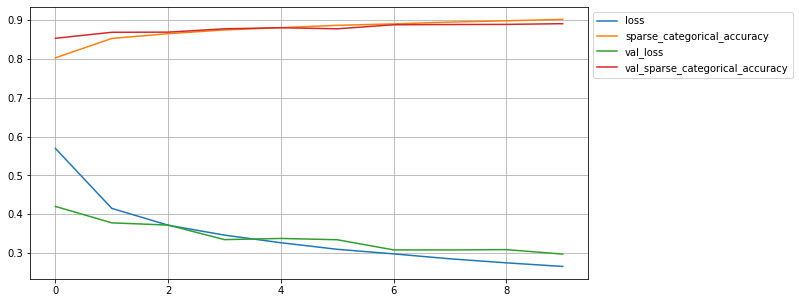

In [ ]:
# Plotting model's learning curve

pd.DataFrame(history.history).plot(figsize = (10, 5))
plt.grid(True)
plt.legend(bbox_to_anchor = (1, 1))

In [ ]:
# As we can see we the model started overfitting the training set after almost 
# after 7th epoch, if we continue training, model's generalization error will increase
# so we will stop here

In [ ]:
# Evaluating the model

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 67.4976 - sparse_categorical_accuracy: 0.8275


[67.49761199951172, 0.8274999856948853]

In [ ]:
# The model is generalizing with 8% error which is not too much error
# Now let us see if it classify images correctly 

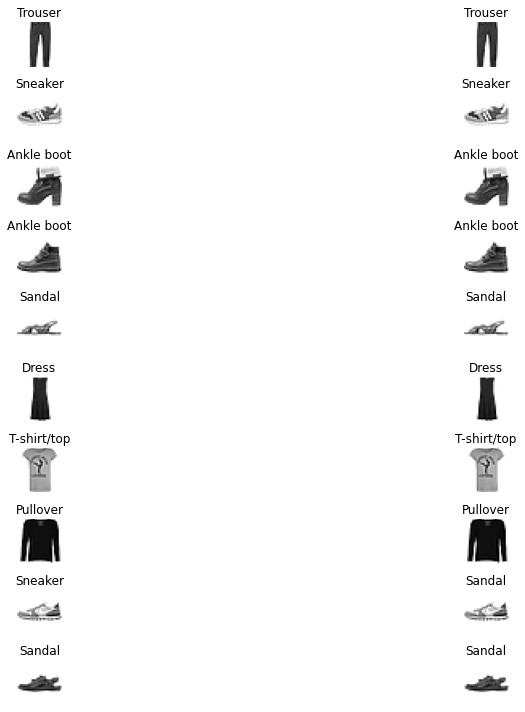

In [ ]:
random_idx = np.random.permutation(X_test.shape[0])[:10]

y_pred = np.argmax(model.predict(X_test[random_idx]), axis = 1)

fig = plt.figure(figsize = (18, 10))

i = 1

for img, lab, pred_lab in zip(X_test[random_idx], y_test[random_idx], y_pred):
  fig.add_subplot(10, 2, i)
  i += 1
  plt.imshow(img, cmap = 'gray_r')
  plt.title(class_names[lab])
  plt.axis('off')

  fig.add_subplot(10, 2, i)
  i += 1
  plt.imshow(img, cmap = 'gray_r')
  plt.title(class_names[pred_lab])
  plt.axis('off')

plt.tight_layout()

In [ ]:
# Great the model has classified 9 out of 10 correctly 